In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("../data/winequality-red.csv")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.duplicated().sum()

240

In [8]:
## remove duplicates
df.drop_duplicates(inplace=True)

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# *Exploratory Data Analysis*

## Distribution of all features

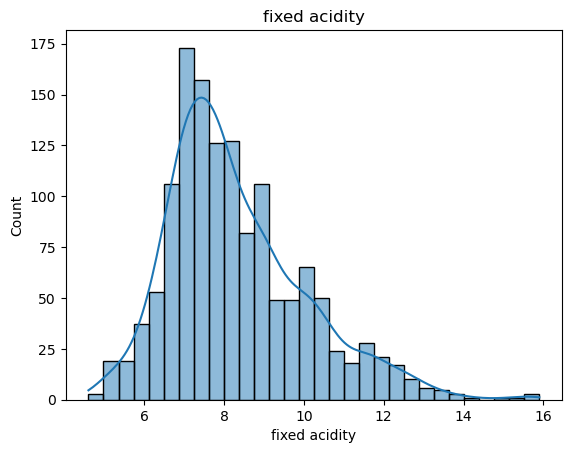

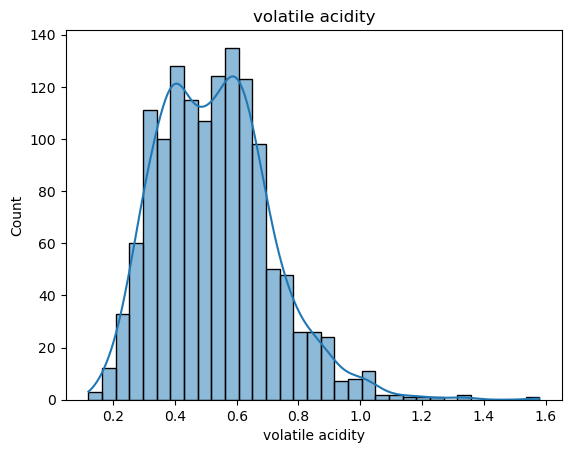

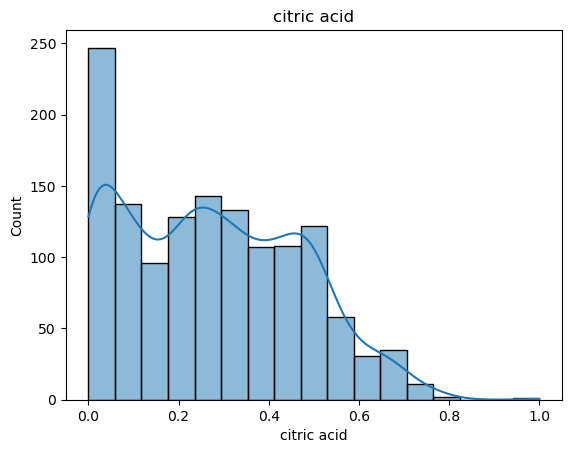

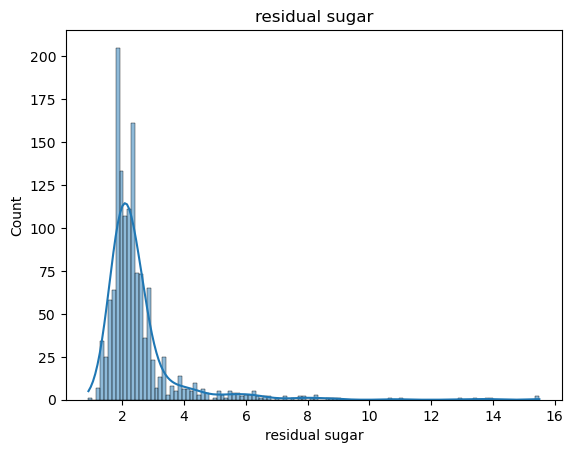

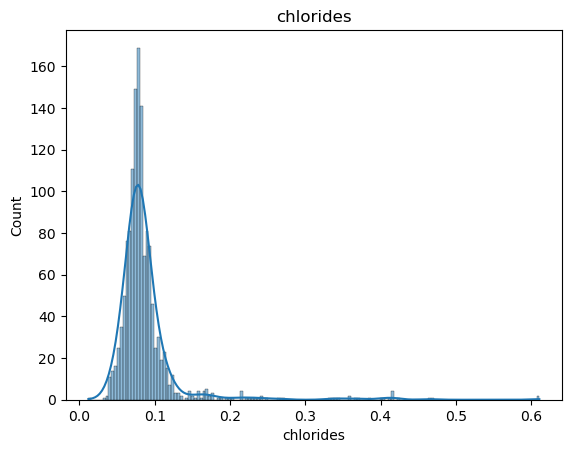

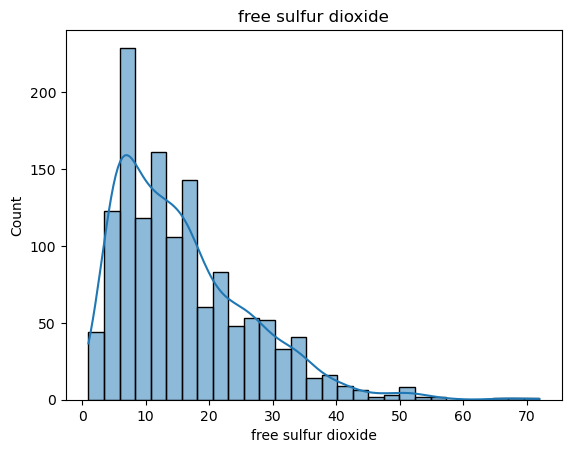

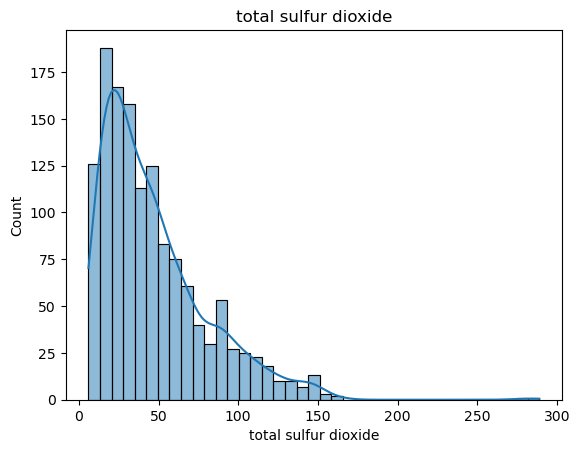

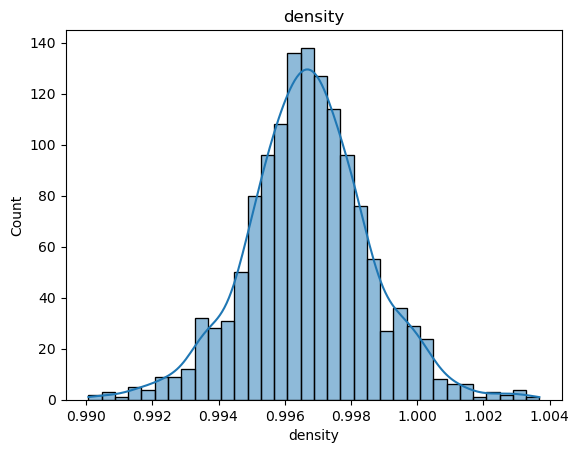

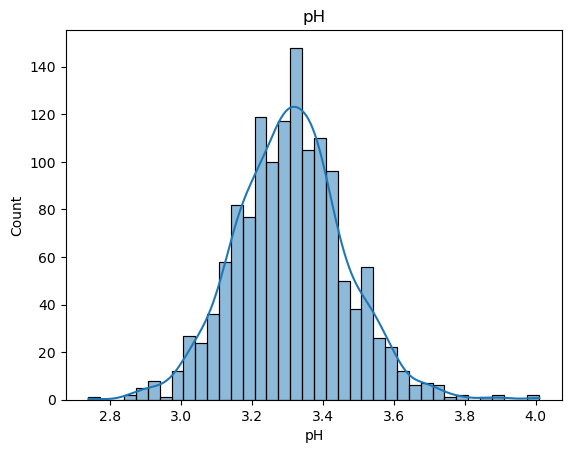

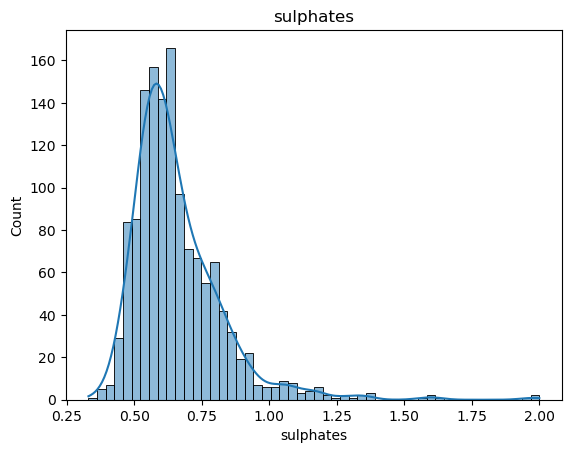

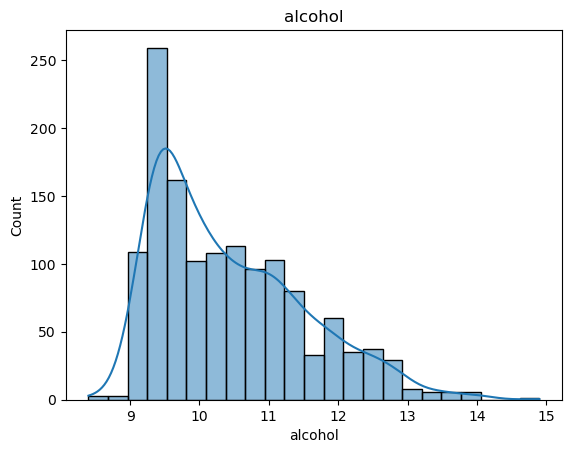

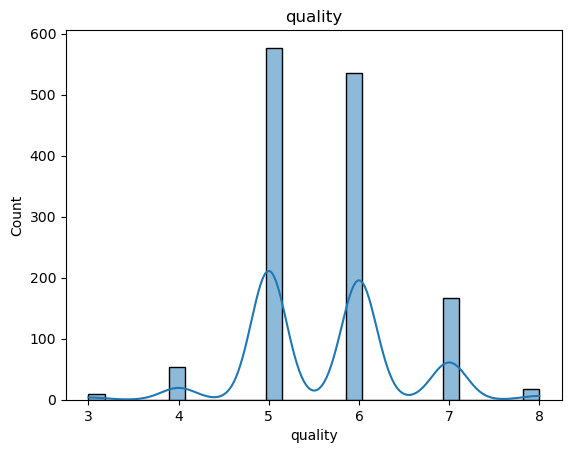

In [10]:
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()

## Checking Outliers

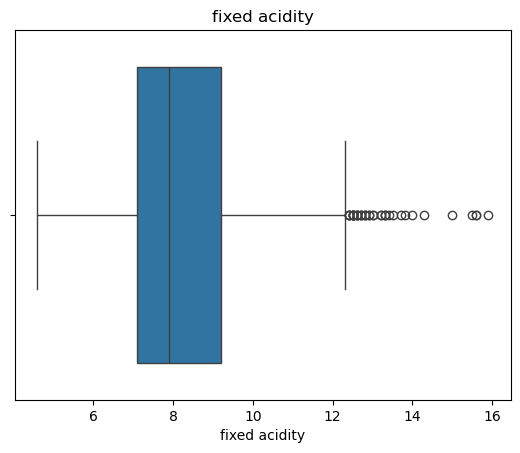

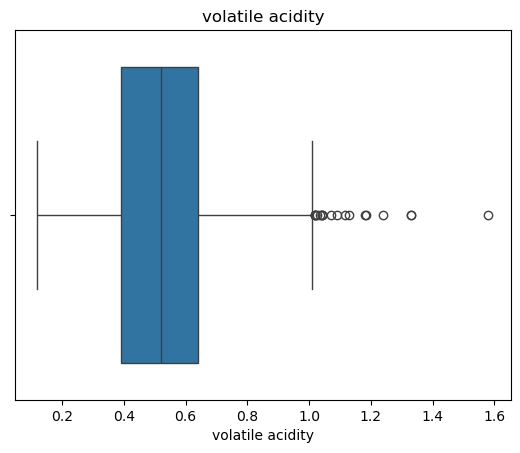

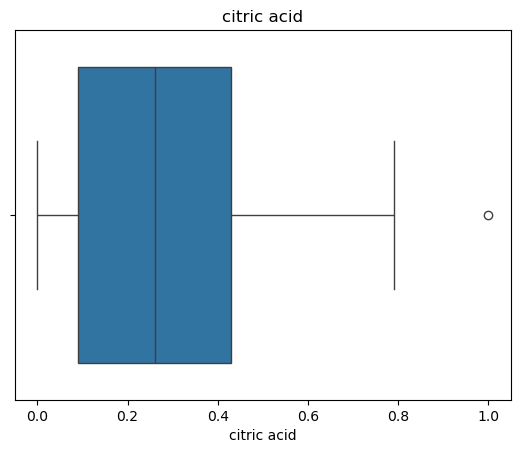

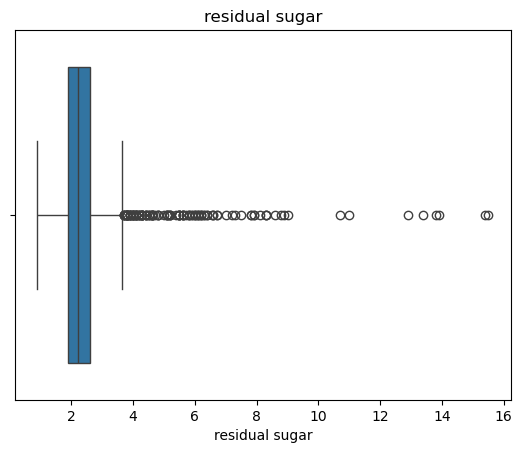

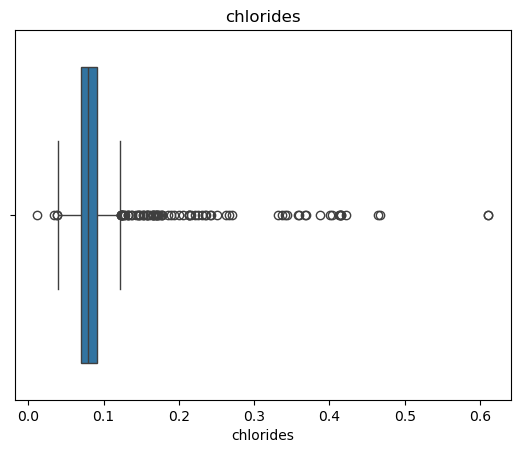

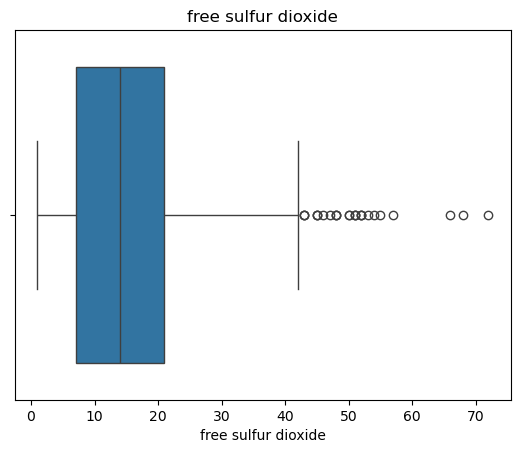

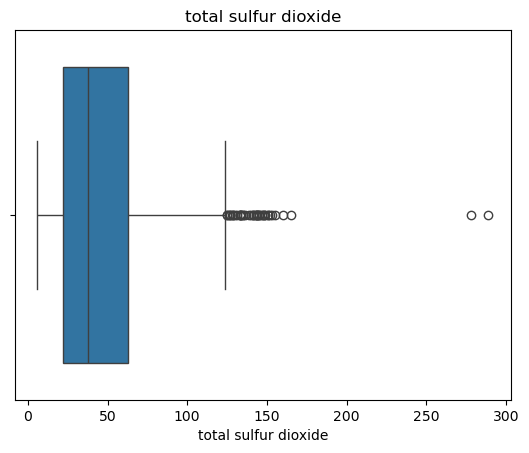

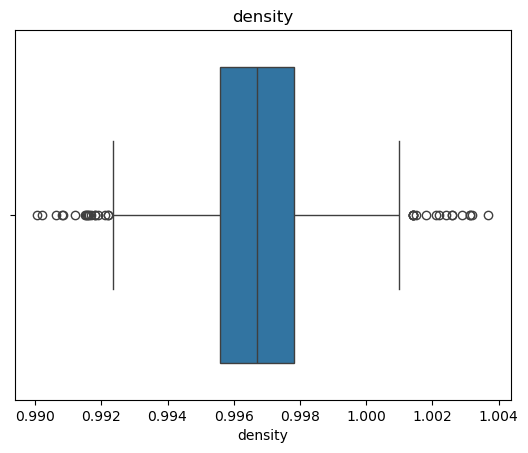

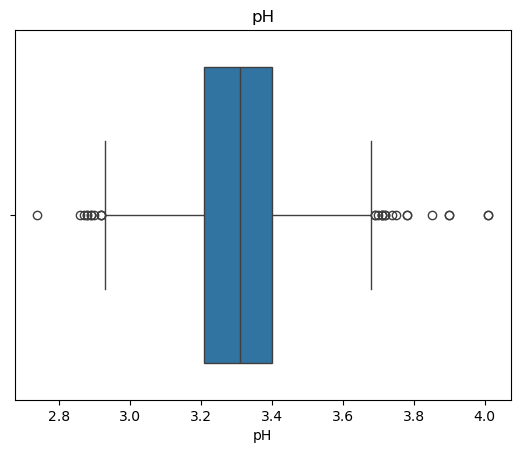

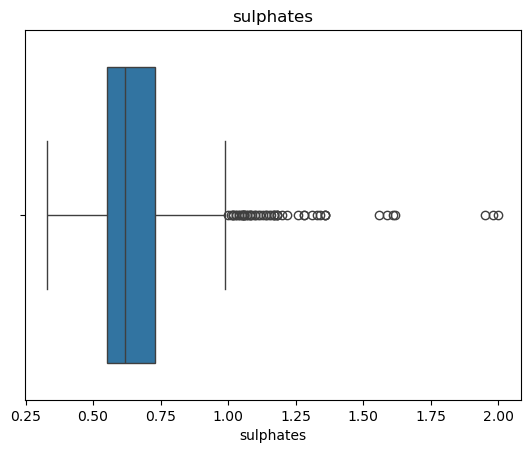

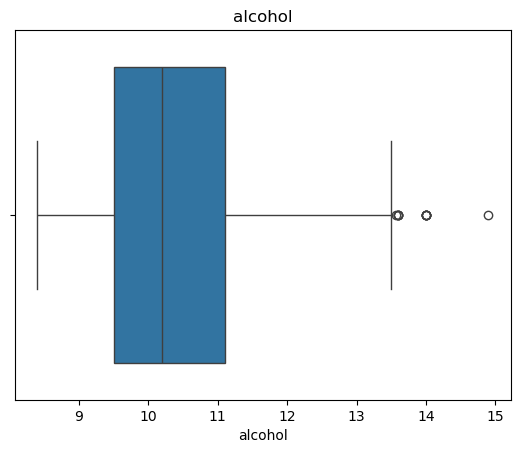

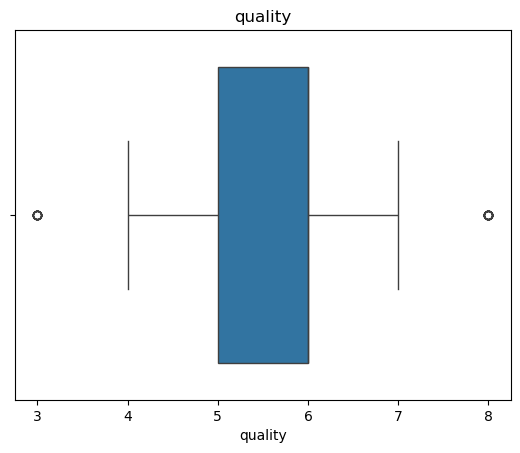

In [11]:
for col in df.columns:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

## Relationship

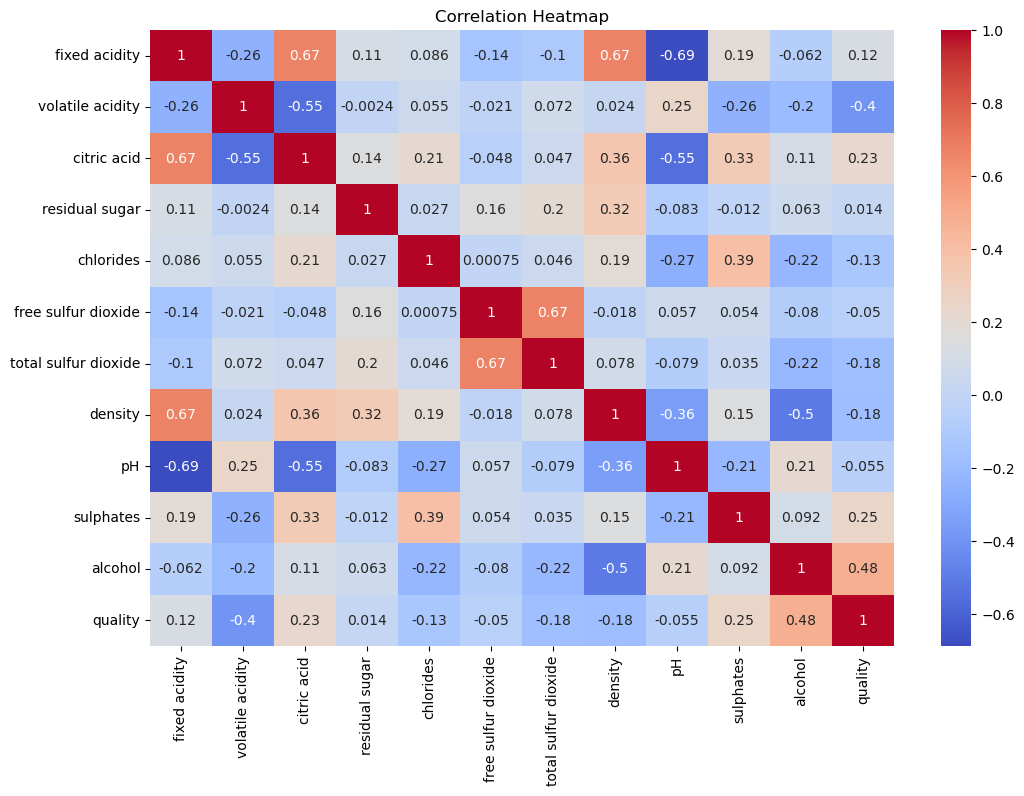

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering

## Removing Outliers

In [13]:
# Define a function to remove outliers using IQR method
def remove_outliers(df):
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply the function to remove outliers
df = remove_outliers(df)
print(f"Shape after removing outliers: {df.shape}")


Shape after removing outliers: (974, 12)


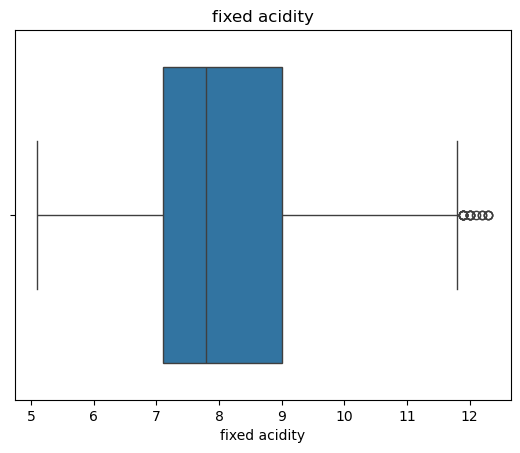

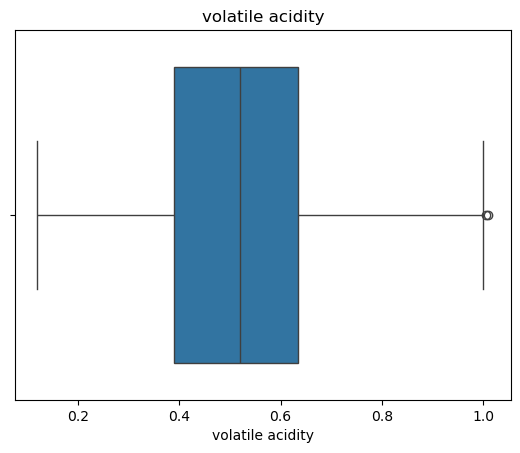

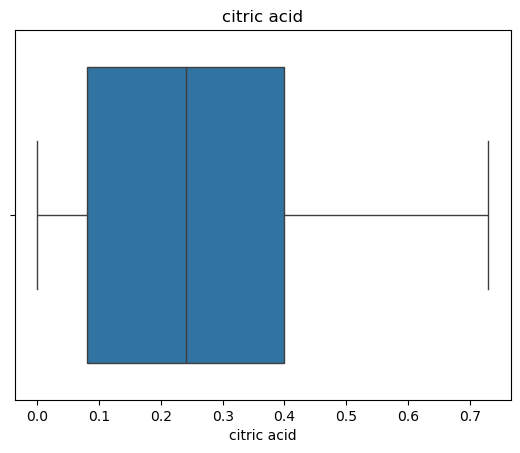

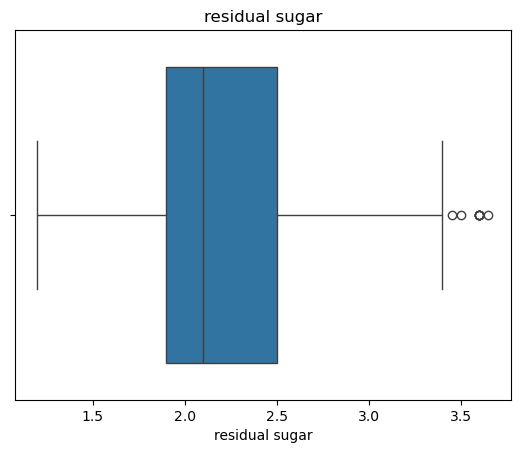

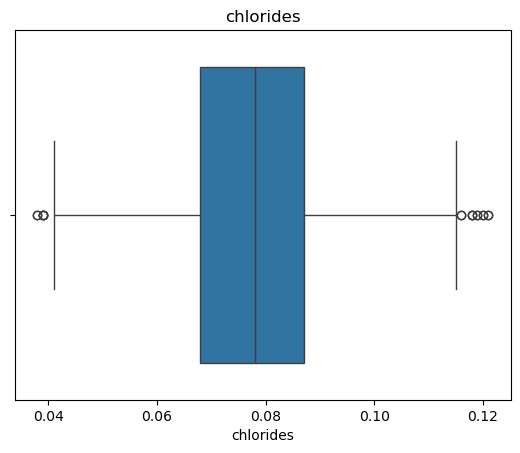

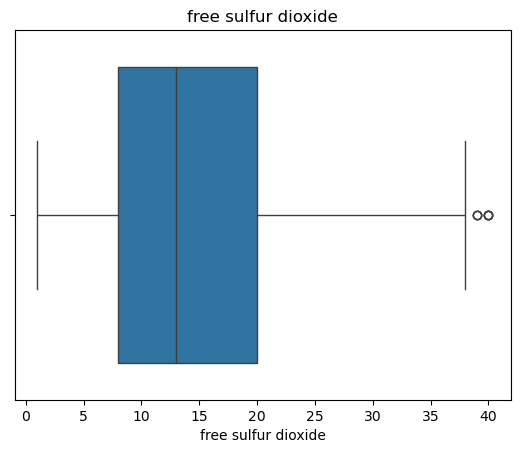

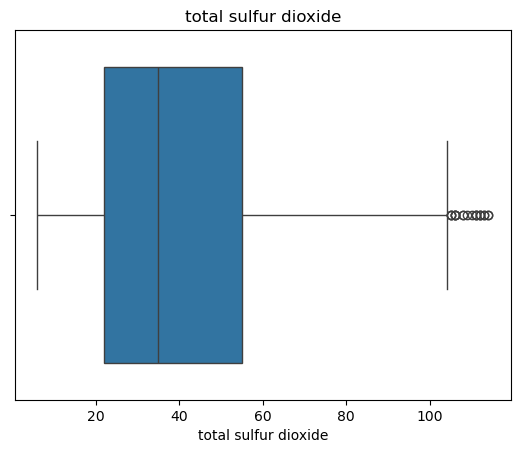

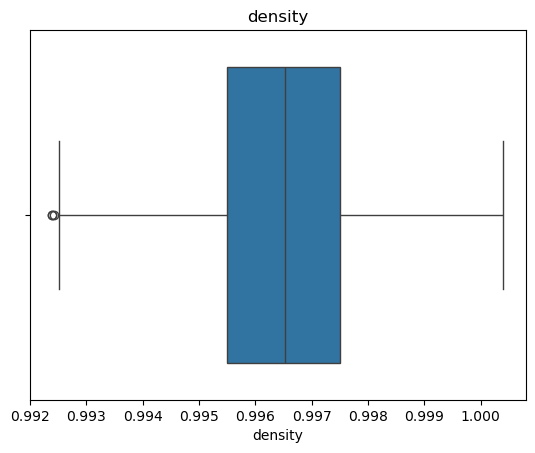

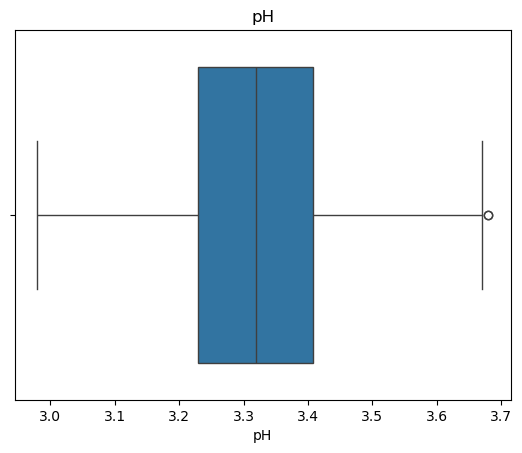

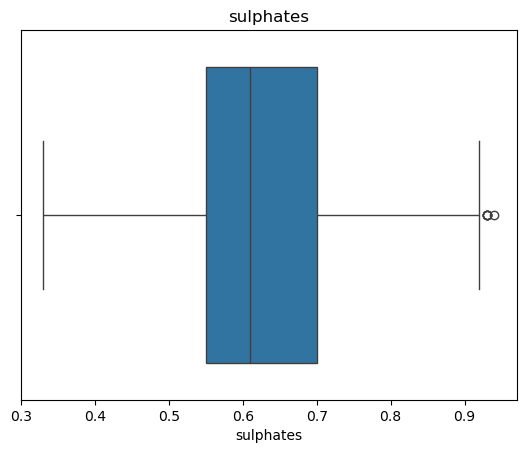

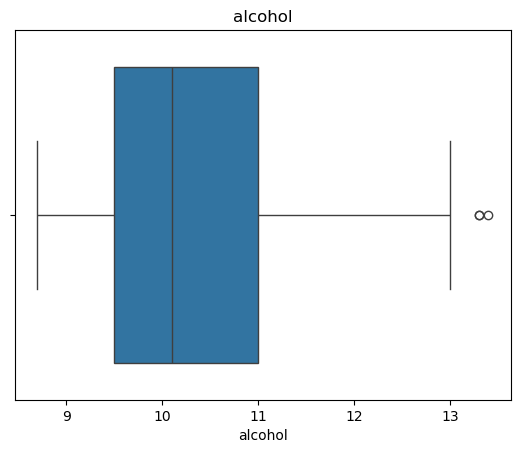

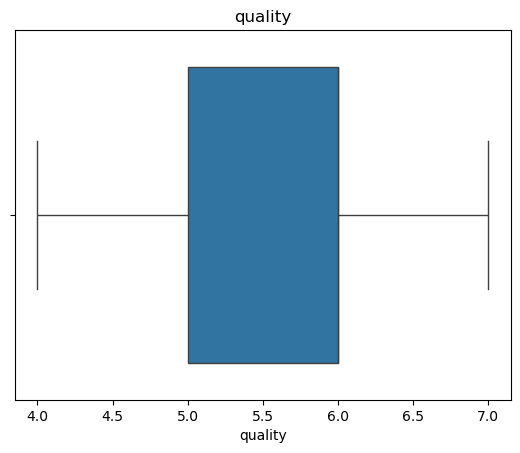

In [14]:
## plot boxplot after removing outliers
for col in df.columns:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

## Quility with three classes 

3,4--> Bad
5,6-->Average
7,8-->High

In [15]:
# Create new quality categories
df['new_quality'] = pd.cut(df['quality'], 
                          bins=[0, 4, 6, 8], 
                          labels=['bad', 'average', 'good'])
print("Counts of each category:")
print(df['new_quality'].value_counts())

Counts of each category:
new_quality
average    826
good       116
bad         32
Name: count, dtype: int64


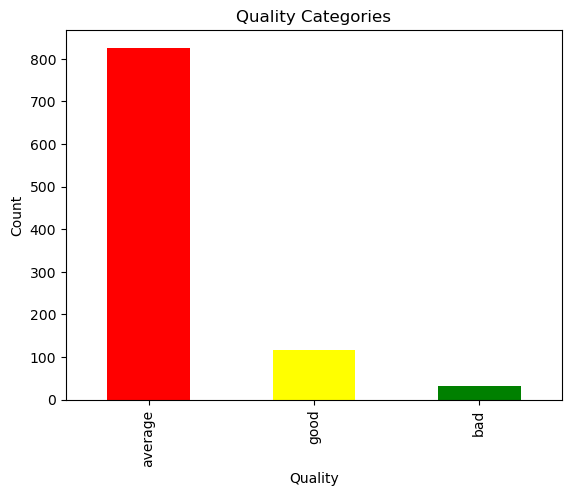

In [16]:
df['new_quality'].value_counts().plot(kind='bar', color=['red', 'yellow', 'green'])
plt.title('Quality Categories')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

## Balance the Classes

In [17]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Prepare features and target
X = df.drop(['quality', 'new_quality'], axis=1)
y = df['new_quality']

# Convert categorical target to numeric
le = LabelEncoder()
y = le.fit_transform(y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Create balanced dataframe
df_balanced = pd.DataFrame(X_balanced, columns=X.columns)
df_balanced['new_quality'] = le.inverse_transform(y_balanced)

print("Original dataset shape:", df.shape)
print("Balanced dataset shape:", df_balanced.shape)
print("\nClass distribution after balancing:")
print(df_balanced['new_quality'].value_counts())

Original dataset shape: (974, 13)
Balanced dataset shape: (2478, 12)

Class distribution after balancing:
new_quality
average    826
good       826
bad        826
Name: count, dtype: int64


## Model Building

In [19]:
# Using the already defined LabelEncoder
y = le.fit_transform(df_balanced['new_quality'])
print("Encoded labels:", le.classes_)
print("Shape of encoded labels:", y.shape)

Encoded labels: ['average' 'bad' 'good']
Shape of encoded labels: (2478,)


In [20]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (1982, 11) (1982,)
Testing set shape: (496, 11) (496,)


In [21]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    print(f"\n{name} Results:")
    print("-" * 50)
    
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Print evaluation metrics
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


Random Forest Results:
--------------------------------------------------
Accuracy: 0.9274

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.82      0.88       159
           1       0.94      0.99      0.97       171
           2       0.90      0.96      0.93       166

    accuracy                           0.93       496
   macro avg       0.93      0.93      0.93       496
weighted avg       0.93      0.93      0.93       496


SVM Results:
--------------------------------------------------
Accuracy: 0.6452

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.52      0.51       159
           1       0.72      0.64      0.68       171
           2       0.70      0.77      0.74       166

    accuracy                           0.65       496
   macro avg       0.64      0.64      0.64       496
weighted avg       0.65      0.65      0.64       496


KNN Results:
--

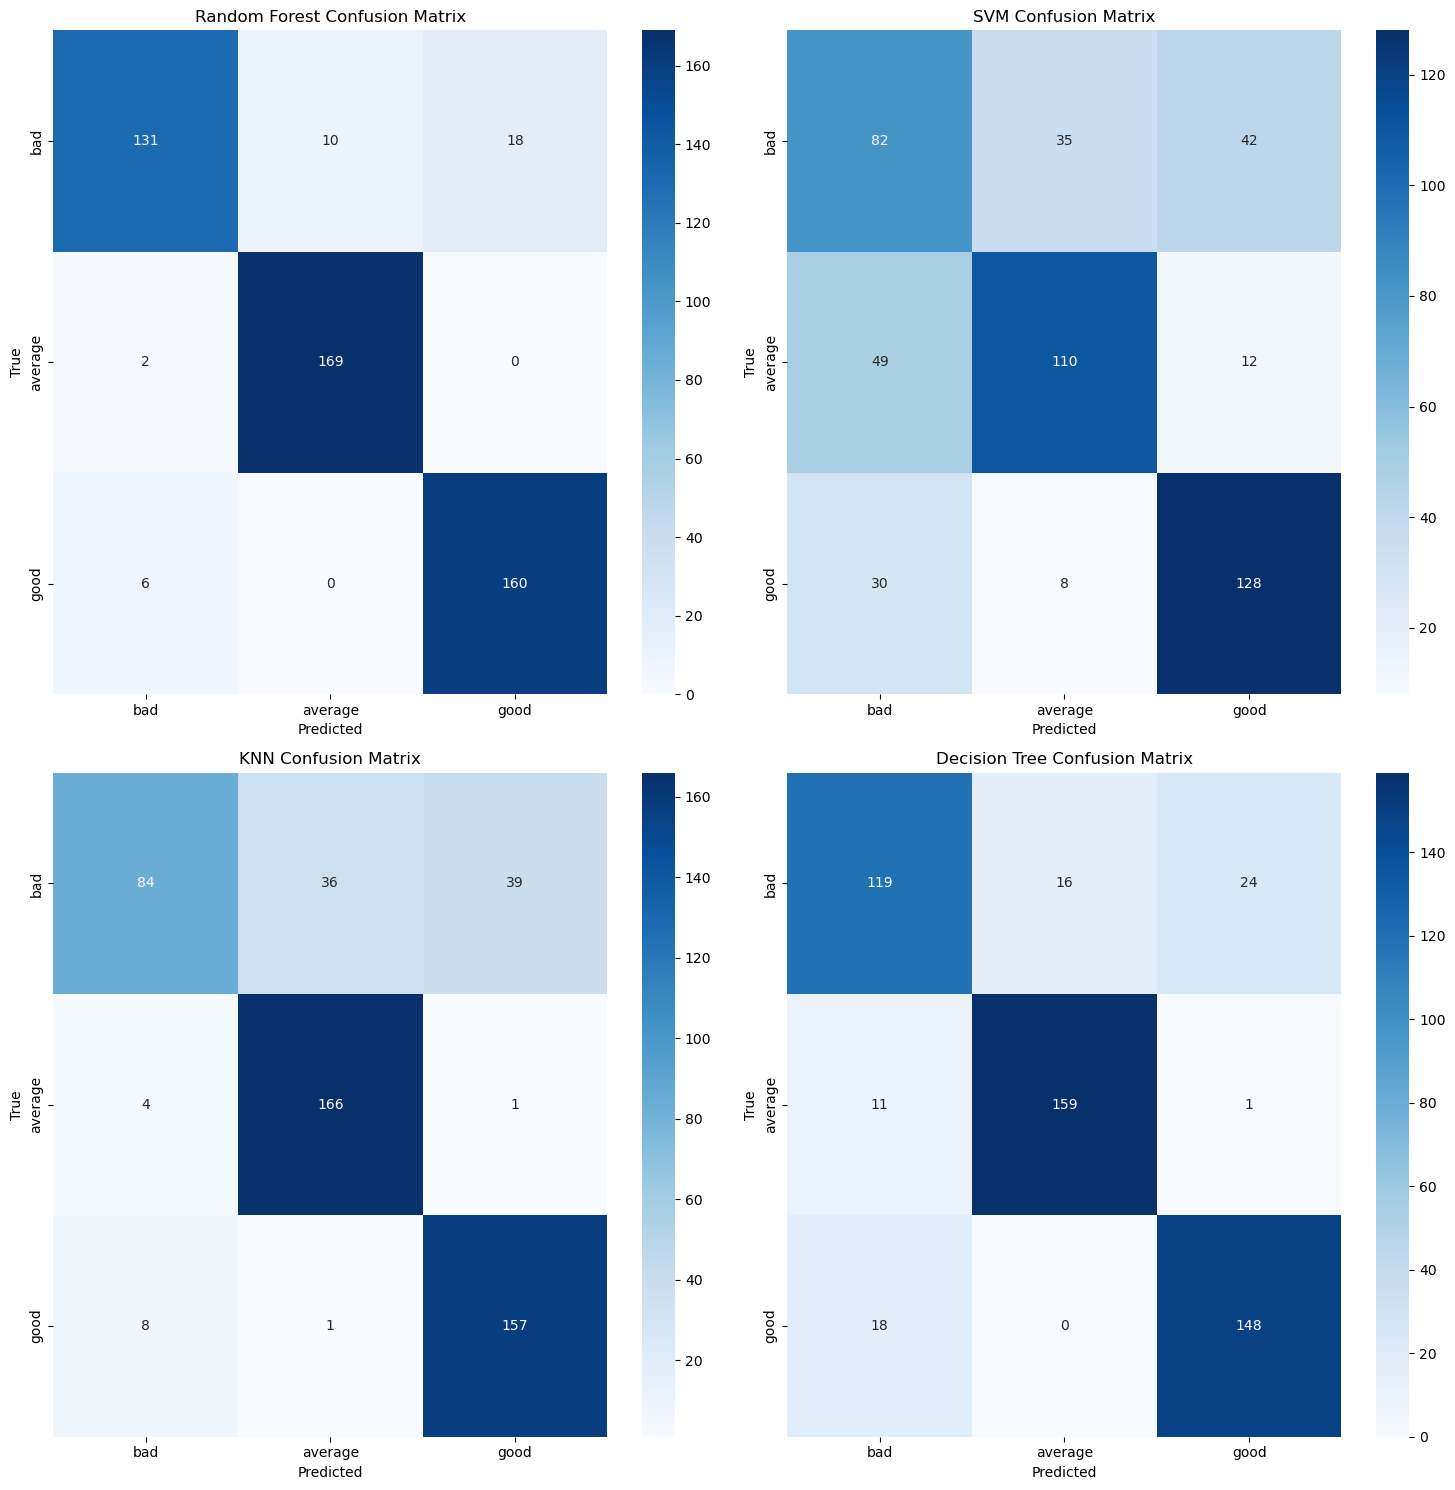

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Create subplots for each classifier
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.ravel()

# Define class labels
class_labels = ['bad', 'average', 'good']

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get predictions
    y_pred = clf.predict(X_test)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[idx], cmap='Blues')
    axes[idx].set_title(f'{name} Confusion Matrix')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('True')
    axes[idx].set_xticklabels(class_labels)
    axes[idx].set_yticklabels(class_labels)

plt.tight_layout()
plt.show()

## Random Forrest Classifier Got Best Result 93 % Accuracy